# Modelo de Clasificación PQR nivel 1

Este libro aborda el preprocesamiento, y el entrenamiento de un modelo de clasificación para PQRs

### Exploración y Preprocesamiento

En esta primera sección se explorará el set de datos y se preprocesarán los textos con los cuales se entrenará el modelo

In [1]:
## importamos las librerias
##
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('PQRs_2018-nov2020.csv', sep=';', encoding='utf-8')

C:\Users\juand\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (2,10,11,14,15,18,19,20,25,26) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.head(3)

,ID,forma_requerimiento,identificacion,solicitante,dir_solicitante,tipo_solicitud,cuenta,fec_solicitud,fec_vencmto,fec_rpta,...,TELEFONO,CELULAR,EMAIL,CIRCUITO,NODO,UBICACION,CLASE_SERVICIO,ANIOMES,Tipo fuente,DOCUMENTO
0,PQR_201901_1,verbal,25161887,OFIR DE MARIA CORREA CORREA,CRA 16 18 06,peticion,101202096,8/01/2019,28/01/2019,8/01/2019,...,NaN,3.00981e+09,NaN,HER23L12,D20299,U,Residencial,201901,PQR,NaN
1,PQR_201901_2,verbal,25155655,AURA ALICIA MEJIA CUERVO,CLL 19 15 74,peticion,101249151,4/01/2019,25/01/2019,4/01/2019,...,3.64131e+06,NaN,NaN,HER23L15,D23538,U,Residencial,201901,PQR,NaN
2,PQR_201901_3,verbal,25161763,AMPARO QUICENO GARCIA,CLL 20 15 15 PSO 2,peticion,101274963,16/01/2019,5/02/2019,16/01/2019,...,NaN,3.11739e+09,NaN,HER23L15,D23553,U,Residencial,201901,PQR,NaN


In [4]:
df['forma_requerimiento'].value_counts()

verbal                       575254
telefonico                    57263
escrito                        8530
pagina web                     6238
e-mail                         1607
asesor remoto                   762
chat                            408
otros medios electronicos        92
sspd                             17
interventoria                     3
Name: forma_requerimiento, dtype: int64

In [5]:
for i in range(15):
    print(df[df['forma_requerimiento']=='e-mail']['OBSERVACION USUARIO'].iloc[i])
    print('\n')

#df_copy[df_copy['tipo_solicitud']==s]['tipo_solicitud_1']

2019022000003 - REVISIÓN COMPLETA AL MEDIDOR -  EL NÚMERO DE CUENTA 120210036, EN DONDE INEXPLICABLEMENTE SE PRESENTÓ UN INCREMENTO EN LA FACTURA POR UN SUPUESTO INCREMENTO DE CONSUMO, EXPUESTO POR USTEDES DE LA MISMA MANERA QUE EL PRESENTE INCIDENTE, LO CUAL ME LLEVA A PENS


RAD 20190220000530 - ADJUNTO DOCUMENTO PARA MANTENER LA EXENCIÓN A LA CONTRIBUCIÓN, TENIENDO EN CUENTA NUESTRA ACTIVIDAD PRINCIPAL.


RAD - 20180220019579 - REALIZAR VISITA PARA VERIFICAR ESTADO DEL SISTEMA E IDENTIFICAR EL POR QUE DEL INCREMENTO DE LA FACTURACIÓN Y HACER


RAD - 20180220020853-,  ADJUNTO RUT ACTUALIZADO PARA BENEFICIO DE EXONERACIÓN DE CONTRIBUCIÓN POR SER INDUSTRIA


RAD - 20180220020853 - ADJUNTO RUT ACTUALIZADO PARA BENEFICIO DE EXONERACIÓN DE CONTRIBUCIÓN POR SER INDUSTRIA


RAD - 20190220000329 - BUENAS TARDES EL DÍA 10 DEL MES EN CURSO A LA VECINA DESAFORTUNADAMENTE SE LE ENCIENDE LA CASA, COMO EL CABLE DE LA ENERGÍA QUE USTEDES PUSIERON PASA POR EL TECHO ESTE CABLE QUE ALIMENTA MI CASA SE

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650175 entries, 0 to 650174
Data columns (total 35 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     650175 non-null  object 
 1   forma_requerimiento    650174 non-null  object 
 2   identificacion         650153 non-null  object 
 3   solicitante            650098 non-null  object 
 4   dir_solicitante        650145 non-null  object 
 5   tipo_solicitud         650175 non-null  object 
 6   cuenta                 650175 non-null  int64  
 7   fec_solicitud          650175 non-null  object 
 8   fec_vencmto            650175 non-null  object 
 9   fec_rpta               650175 non-null  object 
 10  clase_inicial          343509 non-null  object 
 11  estrato                650175 non-null  object 
 12  a_favor_de             650175 non-null  object 
 13  tipo_solicitud_1       650175 non-null  object 
 14  documento              262317 non-nu

In [7]:
## cantidad total de filas
## 
len(df)

650175

In [8]:
df['tipo_solicitud'] = df['tipo_solicitud'].map(lambda x: 'recurso' if x=='recurso reposicion en subsidio de apelacion' or x=='recurso de reposicion' else x)

In [9]:
df_copy = df.copy()

In [10]:
## Eliminacion de NaN
## 
df_copy['OBSERVACION USUARIO'].isna().value_counts()

False    486116
True     164059
Name: OBSERVACION USUARIO, dtype: int64

In [11]:
## Eliminacion de elementos sin sentido
##
df_copy['OBSERVACION USUARIO'] = df_copy['OBSERVACION USUARIO'].map(lambda x: str(x))
df_copy['OBSERVACION USUARIO'] = df_copy['OBSERVACION USUARIO'].map(lambda x: x.lower())
len_obs_usuario = [(i, len(o)) for i, o in enumerate(df_copy['OBSERVACION USUARIO'])]

In [12]:
## Eliminacion de elementos sin sentido
## lista con las observaciones que tengan una longitud de observación menor a
## x caracteres.
##
len_menor_x = [(i,o) for i, o in sorted(len_obs_usuario, key=lambda t: t[1]) if o <=20]
index_menor_x = [i for i, o in len_menor_x]

In [13]:
len(index_menor_x)

196438

In [14]:
# sorted(len_obs_usuario, key= lambda t: t[1])

In [15]:
## Eliminacion elementos sin sentido
## se procede a eliminarlas
##
df_copy.drop(index_menor_x, inplace=True)

In [16]:
df_copy = df_copy.reset_index(drop=True)
#len_obs_usuario = [(i, len(o)) for i, o in enumerate(df_copy['OBSERVACION USUARIO'])]
#sorted(len_obs_usuario, key= lambda t: t[1])

In [17]:
df_copy['len_obs'] = df_copy['OBSERVACION USUARIO'].map(lambda x: len(x))

In [18]:
df_copy['len_obs'].describe()

count    453737.000000
mean         72.165012
std          62.424046
min          21.000000
25%          41.000000
50%          60.000000
75%          79.000000
max        1000.000000
Name: len_obs, dtype: float64

In [19]:
#sns.set_theme()

#sns.relplot(data=df_copy['len_obs'], kind='line')

#df_copy.plot(y='len_obs', kind='line')
#plt.show()

In [20]:
count = 0
for l in df_copy['len_obs']:
    if l >=500:
        count += 1
print(f"{count} es el numero de observaciones se sobrepasan los 500 caracteres, equivalente a un "
     f"{round(count/len(df_copy), 4)}%")

954 es el numero de observaciones se sobrepasan los 500 caracteres, equivalente a un 0.0021%


In [21]:
## Eliminacion elementos sin sentido
## se guardan las observaciones para ver de que se tratan
##
# len_menor_x_obs = [df_copy['OBSERVACION USUARIO'][i] for i, o in len_menor_x]

In [22]:
## Veamos los tipos de solicitudes nivel 1
##
df_copy['tipo_solicitud'].value_counts()

peticion                           415149
reclamo                             21245
pedidos/proyectos                    5682
autogestion                          5392
queja                                3598
programa de financiacion social      2105
recurso                               566
Name: tipo_solicitud, dtype: int64

In [23]:
## Vamos a depurar estos tipos de solicitudes.
##
df_copy['tipo_solicitud'] = df_copy['tipo_solicitud'].map(lambda x: 'peticion' if x=='programa de financiacion social' or x=='autogestion' else x)

In [24]:
## Validamos el cambio
##
df_copy['tipo_solicitud'].value_counts()

peticion             422646
reclamo               21245
pedidos/proyectos      5682
queja                  3598
recurso                 566
Name: tipo_solicitud, dtype: int64

In [25]:
tipos_solicitud = df_copy['tipo_solicitud'].unique().tolist()
for s in tipos_solicitud:
    print(f"{s}: \n")
    print(df_copy[df_copy['tipo_solicitud']==s][['tipo_solicitud_1']].value_counts())
    print("\n")

peticion: 

tipo_solicitud_1                                            
emision de documento para pago                                  156593
pago parcial                                                    134351
separacion temporal o pago dirigido                              30676
trabajos tecnicos en med, trafos, acometidas o en infraestr.     18512
gestionar financiacion                                           15991
                                                                 ...  
tramite recurso de queja sspd                                        3
datos basicos                                                        2
restitucion de tierras                                               2
denuncia de contrato de arrendamiento                                1
actualizacion por habeas data                                        1
Length: 71, dtype: int64


reclamo: 

tipo_solicitud_1                                                
inconformidad con el consumo o produccion f

In [26]:
sorted(df_copy[df_copy['tipo_solicitud']=='peticion']['tipo_solicitud_1'].unique().tolist())

['actualizacion por habeas data',
 'aplicacion beneficio propiedad o venta de activos',
 'caducar financiacion',
 'cambio datos basicos',
 'cambio de datos basicos',
 'cambio de plazo en la financiacion pfs',
 'cambio de uso',
 'certificado deuda pfs',
 'condicion especial por solicitud del propietario',
 'condicion especial solicitud propietario',
 'dano en equipo electrico',
 'danos en equipo electrico',
 'datos basicos',
 'denuncia de contrato de arrendamiento',
 'descongelados covid-19',
 'desenergizacion de infraestructura',
 'devolucion o traslado de saldo a favor',
 'devolucion y/o copia de documentos',
 'direccion incorrecta',
 'direccion incorrecta ',
 'emision de documento para pago',
 'estado deuda pfs',
 'exencion contribucion',
 'facturacion a la fecha',
 'garantias pfs',
 'gestion interna',
 'gestionar financiacion',
 'informacion general',
 'inscripcion, retiro o bloqueo de tarjeta pfs',
 'instalacion con consumos bajos',
 'liquidacion de conexos',
 'modificacion de infr

In [27]:
## hay un monton de tipos de solicitudes nivel 2 que realmente son las mismas
## ej: 'revision, mntto, remodelacion o expansion infraestruc. a.p.' ==  'revision, mtto, remodelacion o expansion a.p'
## vamos a estandarizar esto.
##

In [28]:
import Levenshtein as lev

In [29]:
tipo_sol_nv2_p = []
tipo_sol_nv2_r = []
tipo_sol_nv2_pro = []
tipo_sol_nv2_q = []
tipo_sol_nv2_rso = []
for s in tipos_solicitud:
    temp = sorted(df_copy[df_copy['tipo_solicitud']==s]['tipo_solicitud_1'].unique().tolist())
    for i in range(len(temp) - 1):
        a = temp[i]
        b = temp[i+1]
        ratio = lev.ratio(a, b)
        if ratio >= 0.75:
            if s == 'peticion':
                if a not in tipo_sol_nv2_p:
                    tipo_sol_nv2_p.append(a)
            elif s == 'reclamo':
                if a not in tipo_sol_nv2_r:
                    tipo_sol_nv2_r.append(a)
            elif s == 'pedidos/proyectos':
                if a not in tipo_sol_nv2_pro:
                    tipo_sol_nv2_pro.append(a)
            elif s == 'queja':
                if a not in tipo_sol_nv2_q:
                    tipo_sol_nv2_q.append(a)
            else:
                if a not in tipo_sol_nv2_rso:
                    tipo_sol_nv2_rso.append(a)
        else:
            if s == 'peticion':
                if b not in tipo_sol_nv2_p:
                    tipo_sol_nv2_p.append(b)
            elif s == 'reclamo':
                if b not in tipo_sol_nv2_r:
                    tipo_sol_nv2_r.append(b)
            elif s == 'pedidos/proyectos':
                if b not in tipo_sol_nv2_pro:
                    tipo_sol_nv2_pro.append(b)
            elif s == 'queja':
                if b not in tipo_sol_nv2_q:
                    tipo_sol_nv2_q.append(b)
            else:
                if b not in tipo_sol_nv2_rso:
                    tipo_sol_nv2_rso.append(b)

In [30]:
len(sorted(df_copy[df_copy['tipo_solicitud']=='peticion']['tipo_solicitud_1'].unique().tolist()))

71

In [31]:
len(tipo_sol_nv2_p)

61

In [32]:
tipo_sol_nv2_p.append('actualizacion por habeas data')
tipo_sol_nv2_p = sorted(tipo_sol_nv2_p)
tipo_sol_nv2_p

['actualizacion por habeas data',
 'aplicacion beneficio propiedad o venta de activos',
 'caducar financiacion',
 'cambio datos basicos',
 'cambio de plazo en la financiacion pfs',
 'cambio de uso',
 'certificado deuda pfs',
 'condicion especial por solicitud del propietario',
 'dano en equipo electrico',
 'datos basicos',
 'denuncia de contrato de arrendamiento',
 'descongelados covid-19',
 'desenergizacion de infraestructura',
 'devolucion o traslado de saldo a favor',
 'devolucion y/o copia de documentos',
 'direccion incorrecta',
 'emision de documento para pago',
 'estado deuda pfs',
 'exencion contribucion',
 'facturacion a la fecha',
 'garantias pfs',
 'gestion interna',
 'gestionar financiacion',
 'informacion general',
 'inscripcion, retiro o bloqueo de tarjeta pfs',
 'instalacion con consumos bajos',
 'liquidacion de conexos',
 'modificacion de infraest por incumplimiento de distancias de seg',
 'modificar cobros de terceros',
 'normalizar instalacion',
 'normalizar instalaci

In [33]:
tipo_sol_nv2_p.remove('trabajos tecnicos en med, trafos, acometidas o en infraestr.')

In [34]:
len(sorted(df_copy[df_copy['tipo_solicitud']=='reclamo']['tipo_solicitud_1'].unique().tolist()))

27

In [35]:
len(tipo_sol_nv2_r)

22

In [36]:
tipo_sol_nv2_r.append('clase de uso incorrecto')
tipo_sol_nv2_r = sorted(tipo_sol_nv2_r)
tipo_sol_nv2_r

['clase de uso incorrecto',
 'cobro de acuerdo de pago o financiacion',
 'cobro de cargos relacionados con el servicio publi',
 'cobro de medidor',
 'cobro de otros bienes o servicios en la factura',
 'cobro de revisiones',
 'cobro desconocido',
 'cobro multiple y/o acumulado',
 'cobro por consumos dejados de facturar o recuperacion de energia',
 'cobro por recuperacion de consumos',
 'cobros inoportunos',
 'cobros por conexion, reconexion, reinstalacion',
 'cobros por promedio',
 'cobros por servicios no prestados',
 'estrato incorrecto',
 'inconformidad con el aforo',
 'inconformidad con el consumo o produccion factura',
 'inconformidad por cobros por normalizacion del ser',
 'pago sin abono a cuenta',
 'solicitud de rompimiento de solidaridad',
 'subsidios y contribuciones',
 'tarifa incorrecta',
 'verificacion contrato integral']

In [37]:
len(sorted(df_copy[df_copy['tipo_solicitud']=='pedidos/proyectos']['tipo_solicitud_1'].unique().tolist()))

32

In [38]:
len(tipo_sol_nv2_pro)

29

In [39]:
tipo_sol_nv2_pro.append('asesoria de proyectos')
tipo_sol_nv2_pro.append('revision de proyectos electricos nivel ii y iii')
tipo_sol_nv2_pro = sorted(tipo_sol_nv2_pro)
tipo_sol_nv2_pro

['asesoria de proyectos',
 'cambio de comercializador',
 'cambio de sistema',
 'cancelacion de provisional',
 'cobro legalizacion particulares',
 'conexion del servicio',
 'construccion de redes sn',
 'contrato compra / donacion activos',
 'ejecucion tt',
 'liquidacion conexos otc',
 'observacion a la factibilidad',
 'oferta cbf',
 'portafolio diseno y construccion con cotizacion',
 'portafolio habilitacion vivienda',
 'portafolio instalaciones sin cotizacion',
 'portafolio mantenimiento con cotizacion',
 'portafolio trabajos a terceros con cotizacion',
 'provisional a definitivo',
 'reformas',
 'retiro de servicios temporales',
 'revision de proyectos electricos nivel i',
 'revision de proyectos electricos nivel ii y iii',
 'seguimiento de provisionales',
 'solicitud cambio de comercializador (exporta)',
 'solicitud de interventoria',
 'solicitud factibilidad del servicio',
 'solicitud participacion expansion',
 'solicitud viabilidad compra/donacion activos',
 'solicitudes otc',
 'vis

In [40]:
len(sorted(df_copy[df_copy['tipo_solicitud']=='queja']['tipo_solicitud_1'].unique().tolist()))

29

In [41]:
len(tipo_sol_nv2_q)

23

In [42]:
tipo_sol_nv2_q.append('afectacion ambiental')
tipo_sol_nv2_q = sorted(tipo_sol_nv2_q)
tipo_sol_nv2_q

['afectacion ambiental',
 'cambio de medidor o equipo de medida',
 'comportamiento funcionario (trabajador-contra)',
 'demora en atender peticion',
 'demora en reparar dano',
 'derrame de aceite',
 'entrega inoportuna o no entrega de la factura',
 'estado de la infraestructura',
 'falla en la prestacion del servicio por calidad',
 'falla en la prestacion del servicio por continuida',
 'inadecuada disposicion de residuos',
 'inconformidad con el canal de atencion',
 'inconformidad con la informacion',
 'inconformidad en la atencion de condiciones de seg',
 'inconformidad por la programacion de interrupcione',
 'inconformidad punto de venta y/o recaudo',
 'inconformidad trabajos',
 'inconformidad venta portafolio',
 'incumplimiento de la revision en las fechas establecidas',
 'levantamiento de desechos vegetales',
 'manejo de fauna y flora',
 'no conexion del servicio',
 'no se genera factura para una instalacion',
 'suspension o corte del servicio']

In [43]:
len(sorted(df_copy[df_copy['tipo_solicitud']=='recurso']['tipo_solicitud_1'].unique().tolist()))

17

In [44]:
tipo_sol_nv2_rso = sorted(df_copy[df_copy['tipo_solicitud']=='recurso']['tipo_solicitud_1'].unique().tolist())
tipo_sol_nv2_rso

['clase de uso incorrecto',
 'cobro de cargos relacionados con el servicio publi',
 'cobro de otros bienes o servicios en la factura',
 'cobro por recuperacion de consumos',
 'cobros inoportunos',
 'cobros por conexion, reconexion, reinstalacion',
 'cobros por promedio',
 'cobros por servicios no prestados',
 'envio de expedientes sspd',
 'inconformidad con el consumo o produccion facturad',
 'inconformidad por cobros por normalizacion del ser',
 'negacion del servicio',
 'otros motivos de recurso',
 'pago sin abono a cuenta',
 'solicitud de rompimiento de solidaridad',
 'subsidios y contribuciones',
 'tarifa incorrecta']

In [45]:
## Los siguientes tipos de solicitudes nivel 1 si tuvieron cambion en los
## niveles 2: peticion, reclamo, pedidos/proyectos, queja
## estos se procederan a estadarizarce.
##
def nv2_replacements(solicitud_nv2):
    s = tipo_sol_nv2_p + tipo_sol_nv2_r + tipo_sol_nv2_pro + tipo_sol_nv2_q + tipo_sol_nv2_rso
    s.remove('revision de proyectos electricos nivel i')
    s.remove('revision de proyectos electricos nivel ii y iii')
    s.remove('falla en la prestacion del servicio por calidad')
    s.remove('falla en la prestacion del servicio por continuida')
    for element in s:
        if lev.ratio(element, solicitud_nv2) >= 0.75:
            solicitud_nv2 = element
        else:
            solicitud_nv2
    return solicitud_nv2

In [46]:
df_copy['tipo_solicitud_1'] = df_copy['tipo_solicitud_1'].map(nv2_replacements)

In [47]:
sorted(df_copy['tipo_solicitud_1'].unique().tolist())

['actualizacion por habeas data',
 'afectacion ambiental',
 'aplicacion beneficio propiedad o venta de activos',
 'asesoria de proyectos',
 'caducar financiacion',
 'cambio de comercializador',
 'cambio de medidor o equipo de medida',
 'cambio de plazo en la financiacion pfs',
 'cambio de sistema',
 'cambio de uso',
 'cancelacion de provisional',
 'clase de uso incorrecto',
 'cobro de acuerdo de pago o financiacion',
 'cobro de cargos relacionados con el servicio publi',
 'cobro de medidor',
 'cobro de otros bienes o servicios en la factura',
 'cobro de revisiones',
 'cobro desconocido',
 'cobro legalizacion particulares',
 'cobro multiple y/o acumulado',
 'cobro por consumos dejados de facturar o recuperacion de energia',
 'cobro por recuperacion de consumos',
 'cobros inoportunos',
 'cobros por conexion, reconexion, reinstalacion',
 'cobros por promedio',
 'cobros por servicios no prestados',
 'comportamiento funcionario (trabajador-contra)',
 'condicion especial por solicitud del pr

In [48]:
df_copy['tipo_solicitud_1'] = df_copy['tipo_solicitud_1'].map(lambda x: 'falla en la prestacion del servicio por continuidad' if x=='falla en la prestacion del servicio por continuida' else x)
df_copy['tipo_solicitud_1'] = df_copy['tipo_solicitud_1'].map(lambda x: 'trabajos tecnicos en med, trafos, acometidas o en infraestr.' if x=='trabajos tecnicos en medidores, transformadores, a' else x)

In [49]:
sorted(df_copy['tipo_solicitud_1'].unique().tolist())

['actualizacion por habeas data',
 'afectacion ambiental',
 'aplicacion beneficio propiedad o venta de activos',
 'asesoria de proyectos',
 'caducar financiacion',
 'cambio de comercializador',
 'cambio de medidor o equipo de medida',
 'cambio de plazo en la financiacion pfs',
 'cambio de sistema',
 'cambio de uso',
 'cancelacion de provisional',
 'clase de uso incorrecto',
 'cobro de acuerdo de pago o financiacion',
 'cobro de cargos relacionados con el servicio publi',
 'cobro de medidor',
 'cobro de otros bienes o servicios en la factura',
 'cobro de revisiones',
 'cobro desconocido',
 'cobro legalizacion particulares',
 'cobro multiple y/o acumulado',
 'cobro por consumos dejados de facturar o recuperacion de energia',
 'cobro por recuperacion de consumos',
 'cobros inoportunos',
 'cobros por conexion, reconexion, reinstalacion',
 'cobros por promedio',
 'cobros por servicios no prestados',
 'comportamiento funcionario (trabajador-contra)',
 'condicion especial por solicitud del pr

In [50]:
## los resultados de estos cambios
##
print(f"Se pasó de tener {len(df['tipo_solicitud_1'].unique())} solicitudes nivel 2 a {len(df_copy['tipo_solicitud_1'].unique())}")

Se pasó de tener 163 solicitudes nivel 2 a 132


Esta primer parte de exploración dejó como resultado una depuración de registros sin sentido y con poco valor semántico, además de una depuración de clasificaciones nivel 2.

A continuación, se procede con el preprocesamiento

In [51]:
## normalización de los textos.
##
import re
import spacy
import nltk
nltk.download('stopwords')
from nltk import RegexpTokenizer
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.collocations import *
from spellchecker import SpellChecker
nlp = spacy.load('es_core_news_md')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\juand\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [52]:
def text_normalization(text):
    stop_words = list(stopwords.words('spanish'))  
    no_value_words = ['fecha', 'valor']
    for w in no_value_words:
        stop_words.append(w)
    text = str(text)
    text = text.lower()
    text = ' '.join(re.findall(r'[a-záéíóúñ]{2,}', text))
    
    text = word_tokenize(text)
    for w in stop_words:
        while w in text: text.remove(w)
    return' '.join(list(dict.fromkeys(text)))

In [53]:
df_copy['OBSERVACION USUARIO']

0                 solicita pago parcial del valor facturado
1                         cliente solicita copia de factura
2                         cliente solicita copia de factura
3                 solicita pago parcial del valor facturado
4                         cliente solicita copia de factura
                                ...                        
453732    cumple requisitos abono factura n. 82786970, f...
453733    factura con saldo saldo factura n. 82786969, f...
453734    cumple requisitos abono factura n. 82786968, f...
453735    usuaria solicita cancelar créditos por decreto...
453736    cumple requisitos abono factura n. 82779373, f...
Name: OBSERVACION USUARIO, Length: 453737, dtype: object

In [54]:
text_normalization(df_copy['OBSERVACION USUARIO'][453732])

'cumple requisitos abono factura'

In [ ]:
df_copy['OBSERVACION USUARIO'] = df_copy['OBSERVACION USUARIO'].map(text_normalization)
df_copy['OBSERVACION USUARIO']

In [ ]:
## despues de la normalizacion se volvera a buscar textos sin
## sentido
##
len_obs_usuario = [(i, len(o)) for i, o in enumerate(df_copy['OBSERVACION USUARIO'])]
len_menor_x = [(i,o) for i, o in sorted(len_obs_usuario, key=lambda t: t[1]) if o <=4]
index_menor_x = [i for i, o in len_menor_x]
len(len_menor_x)

In [ ]:
df_copy.drop(index_menor_x, inplace=True)

In [ ]:
## hay que resetear los indices de nuevo.
df_copy = df_copy.reset_index(drop=True)

In [ ]:
## Remocion de los bi-gramas frecuentes sin valor semantico.

bigram_measures = nltk.collocations.BigramAssocMeasures()
trigram_measures = nltk.collocations.TrigramAssocMeasures()

tokens = []
for o in df_copy['OBSERVACION USUARIO']:
    for token in word_tokenize(o):
        tokens.append(token)
        
finder = BigramCollocationFinder.from_words(tokens)
finder.nbest(bigram_measures.likelihood_ratio, 20)

In [ ]:
## solo se identifica un bi-grama que no genera valor: ('autogest', 'autogestión')
##
df_copy['OBSERVACION USUARIO'] = df_copy['OBSERVACION USUARIO'].map(lambda x: x.replace('autogest autogestion', ''))

In [ ]:
df_copy['OBSERVACION USUARIO'] = df_copy['OBSERVACION USUARIO'].map(lambda x: x.replace('autogest autogestión', ''))

In [ ]:
## Se eliminan espacios dobles
##
df_copy['OBSERVACION USUARIO'] = df_copy['OBSERVACION USUARIO'].map(lambda x: x.replace('  ', ' '))

In [ ]:
## en lineas generales los textos han quedado así
df_copy['OBSERVACION USUARIO']

In [ ]:
df_copy.head(3)

In [ ]:
df_copy['tipo_solicitud'].value_counts()

In [ ]:
## ----- A partir de aquí nos centraremos en equilibrar los tipos de solicitudes -----
## la idea acá es balancear un poco la cantidad de registros entre categorias
## las peticiones hay que reducirlas lo máximo posible podemos quedar al menos con
## unas 10,000 al igual que los reclamos tener unos 10,000. Por el lado de los recursos
## se ensayará creando unos registros sintéticos con LSTM.

In [ ]:
datos = df_copy[['tipo_solicitud', 'tipo_solicitud_1', 'OBSERVACION USUARIO']]

In [ ]:
datos['tipo_solicitud'].value_counts()

In [ ]:
datos.to_csv('PQR_modelo.csv',
                sep=',',
                header=datos_md.columns,
                index=False)

In [70]:
## Exploremos las peticiones y miremos como hacemos para depurarlas

In [71]:
datos_peticiones = datos[datos['tipo_solicitud']=='peticion'][['tipo_solicitud', 'tipo_solicitud_1', 'OBSERVACION USUARIO']]
datos_peticiones.head(3)

,tipo_solicitud,tipo_solicitud_1,OBSERVACION USUARIO
0,peticion,pago parcial,solicita pago parcial facturado
1,peticion,emision de documento para pago,cliente solicita copia factura
2,peticion,emision de documento para pago,cliente solicita copia factura


In [72]:
datos_peticiones['tipo_solicitud_1'].value_counts()

## para las siguientes categorías se dejan unicamente 1,000 registros por
## categoría:
## emision de documento para pago                                      
## pago parcial                                                        
## separacion temporal o pago dirigido                                  
## informacion general                                                  
## trabajos tecnicos en med, trafos, acometidas o en infraestr.         
## datos basicos                                                        
## reconexion                                                           
## gestionar financiacion                                               
## descongelados covid-19                                               
## exencion contribucion                                                 
## notificacion decision y/o descargos     

emision de documento para pago                                      156593
pago parcial                                                        134347
separacion temporal o pago dirigido                                  30676
trabajos tecnicos en med, trafos, acometidas o en infraestr.         20001
datos basicos                                                        17596
gestionar financiacion                                               15991
reconexion                                                           13810
descongelados covid-19                                               11054
informacion general                                                   9138
exencion contribucion                                                 2640
notificacion decision y/o descargos                                   2178
inscripcion, retiro o bloqueo de tarjeta pfs                           902
poda de arboles                                                        762
cambio de plazo en la fin

In [73]:
peticiones_depurar = ['emision de documento para pago',
                      'pago parcial',
                      'separacion temporal o pago dirigido',
                      'informacion general',
                      'trabajos tecnicos en med, trafos, acometidas o en infraestr.',
                      'datos basicos',
                      'reconexion',
                      'gestionar financiacion',
                      'descongelados covid-19',
                      'exencion contribucion',
                      'notificacion decision y/o descargos',
                      'inscripcion, retiro o bloqueo de tarjeta pfs',
                      'poda de arboles',
                      'cambio de plazo en la financiacion pfs',
                      'terminacion del contrato',
                      'pago de la factura de otro usuario',
                      'condicion especial por solicitud del propietario',
                      'direccion incorrecta',
                      'tarjeta somos (pfs)',
                      'requerimiento competencia de otra empresa',
                      'perjuicios por falla en la prestacion del servicio',
                      'dano en equipo electrico',
                      'devolucion o traslado de saldo a favor']

In [74]:
import random

for p in peticiones_depurar:
    temp = datos_peticiones[datos_peticiones['tipo_solicitud_1']==p]
    indexes = temp.index
    index_sample = random.sample(list(indexes), len(temp)-180)
    datos_peticiones.drop(index_sample, inplace=True)

In [75]:
datos_peticiones['tipo_solicitud_1'].value_counts()

cambio de uso                                                       461
liquidacion conexos otc                                             386
poda de arboles                                                     180
informacion general                                                 180
tarjeta somos (pfs)                                                 180
descongelados covid-19                                              180
devolucion o traslado de saldo a favor                              180
dano en equipo electrico                                            180
gestionar financiacion                                              180
requerimiento competencia de otra empresa                           180
normalizar instalacion consumos bajos                               180
direccion incorrecta                                                180
terminacion del contrato                                            180
perjuicios por falla en la prestacion del servicio              

In [76]:
len(datos_peticiones)

6788

In [77]:
## Exploremos los reclamos y miremos como hacemos para depurarlas

In [78]:
datos_reclamo = datos[datos['tipo_solicitud']=='reclamo'][['tipo_solicitud', 'tipo_solicitud_1', 'OBSERVACION USUARIO']]
datos_reclamo.head(3)

,tipo_solicitud,tipo_solicitud_1,OBSERVACION USUARIO
21,reclamo,inconformidad con el consumo o produccion fact...,revisión completa coordinar visita cel usuario...
35,reclamo,inconformidad con el consumo o produccion fact...,revisar consumo periodo noviembre diciembre pa...
104,reclamo,inconformidad con el consumo o produccion fact...,revisión completa acuerdo cita usuaria solicit...


In [79]:
datos_reclamo['tipo_solicitud_1'].value_counts()

inconformidad con el consumo o produccion facturad                  19295
cobros por conexion, reconexion, reinstalacion                        529
cobro de cargos relacionados con el servicio publi                    304
pago sin abono a cuenta                                               236
cobros por promedio                                                   209
cobro de otros bienes o servicios en la factura                       110
cobro por recuperacion de consumos                                     95
cobro desconocido                                                      62
estrato incorrecto                                                     59
cobro multiple y/o acumulado                                           57
subsidios y contribuciones                                             49
tarifa incorrecta                                                      34
cobros inoportunos                                                     33
cobro de acuerdo de pago o financiacio

In [80]:
temp = datos_reclamo[datos_reclamo['tipo_solicitud_1']=='inconformidad con el consumo o produccion facturad']
indexes = temp.index
index_sample = random.sample(list(indexes), len(temp)-9000)
datos_reclamo.drop(index_sample, inplace=True)

In [81]:
datos_reclamo['tipo_solicitud_1'].value_counts()

inconformidad con el consumo o produccion facturad                  9000
cobros por conexion, reconexion, reinstalacion                       529
cobro de cargos relacionados con el servicio publi                   304
pago sin abono a cuenta                                              236
cobros por promedio                                                  209
cobro de otros bienes o servicios en la factura                      110
cobro por recuperacion de consumos                                    95
cobro desconocido                                                     62
estrato incorrecto                                                    59
cobro multiple y/o acumulado                                          57
subsidios y contribuciones                                            49
tarifa incorrecta                                                     34
cobros inoportunos                                                    33
cobro de acuerdo de pago o financiacion            

In [82]:
len(datos_reclamo)

10950

In [83]:
## Ahora sobre los recuros.
## se ensayará creando unos registros sintéticos con LSTM

In [84]:
datos_recurso = datos[datos['tipo_solicitud']=='recurso'][['tipo_solicitud', 'tipo_solicitud_1', 'OBSERVACION USUARIO']]
datos_recurso.head(3)

,tipo_solicitud,tipo_solicitud_1,OBSERVACION USUARIO
132715,recurso,inconformidad con el consumo o produccion fact...,usuario encuentra acuerdo valores facturados o...
133940,recurso,cobro por recuperacion de consumos,usuario trae recurso reposición apelación acto...
134190,recurso,inconformidad con el consumo o produccion fact...,usuaria solicita revision pues deacuerdo factu...


In [85]:
## vamos a remover la puntuacion y los valores numericos de estas observaciones.
## se dejaran los stopwords.
##
datos_recurso['OBSERVACION USUARIO'] = datos_recurso['OBSERVACION USUARIO'].map(lambda x: str(x))
datos_recurso['OBSERVACION USUARIO'] = datos_recurso['OBSERVACION USUARIO'].map(lambda x: x.lower())
datos_recurso['OBSERVACION USUARIO'] = datos_recurso['OBSERVACION USUARIO'].map(lambda x: ' '.join(re.findall(r'[a-záéíóúñ]{2,}', x)))

In [86]:
datos_recurso['len_obs'] = datos_recurso['OBSERVACION USUARIO'].map(lambda x: len(x))
datos_recurso['len_obs'].describe()

count    566.000000
mean     159.166078
std      129.730356
min       22.000000
25%       75.250000
50%      110.000000
75%      181.500000
max      636.000000
Name: len_obs, dtype: float64

In [87]:
## Se eliminan los recursos con len < 50
##
datos_recurso = datos_recurso.reset_index(drop=True)
len_obs_usuario = [(i, len(o)) for i, o in enumerate(datos_recurso['OBSERVACION USUARIO'])]
len_menor_x = [(i,o) for i, o in sorted(len_obs_usuario, key=lambda t: t[1]) if o <=50]
index_menor_x = [i for i, o in len_menor_x]

In [88]:
datos_recurso.drop(index_menor_x, inplace=True)

In [89]:
datos_recurso['len_obs'].describe()

count    542.000000
mean     164.457565
std      130.045894
min       51.000000
25%       80.000000
50%      113.000000
75%      184.750000
max      636.000000
Name: len_obs, dtype: float64

In [90]:
len(datos_recurso)

542

In [91]:
# sacamos todos los tokens en una lista.
tokens = []
for o in datos_recurso['OBSERVACION USUARIO']:
    for token in word_tokenize(o):
        tokens.append(token)

# organize into sequences of tokens
train_len = 50+1 # 50 training words , then one target word

# Empty list of sequences
text_sequences = []

for i in range(train_len, len(tokens)):
    
    # Grab train_len# amount of characters
    seq = tokens[i-train_len:i]
    
    # Add to list of sequences
    text_sequences.append(seq)

In [92]:
## se valida lo que se hizo con las secuencias. 
' '.join(text_sequences[224])

'respuesta recurrente informa justificacion tecnica valores cobrados pues presentado cambio interior vivienda habitantes usuario presenta recurso indicando fuga generada vendabal derribo cuerdas solicita exoneracion pago deuda leído detenimiento recurso usted manifiesta textualmente dirijo ustedes fin interponer reposición pasado julio presente año dieron respuesta radicado anterior dado justificada consumo facturaron meses marzo'

In [93]:
##  Importamos Keras
from keras.preprocessing.text import Tokenizer

In [94]:
# integer encode sequences of words
tokenizer = Tokenizer()
tokenizer.fit_on_texts(text_sequences)
sequences = tokenizer.texts_to_sequences(text_sequences)

In [95]:
# sequences[0]

In [96]:
## Con esto se puede ver todo el vocab tokenizer.index_word

In [97]:
## Ejemplo de una secuencia, con sus indices de acuerdo al vocab y la palabra
##
for i in sequences[0]:
    print(f'{i} : {tokenizer.index_word[i]}')

20 : usuario
86 : encuentra
14 : acuerdo
39 : valores
50 : facturados
2965 : otrso
1190 : cargos
775 : mano
2964 : obra
20 : usuario
1189 : trae
2 : recurso
13 : reposición
12 : apelación
547 : acto
143 : julio
106 : usuaria
68 : solicita
70 : revision
8 : pues
774 : deacuerdo
23 : facturado
24 : mes
45 : mayo
213 : kwh
1 : respuesta
20 : usuario
6 : manifiesta
231 : justificacion
28 : consumos
50 : facturados
41 : cuenta
2956 : aire
2955 : acondcionado
212 : tampoco
230 : nevera
70 : revision
292 : completa
106 : usuaria
34 : inconforme
104 : alto
3 : consumo
24 : mes
45 : mayo
187 : comprendido
31 : abril
291 : dice
2953 : continua
58 : mismo
1 : respuesta
20 : usuario


In [98]:
## con este tokenizador puede verse una lista de tuplas con las palabras y sus 
## respectivas frecuencias.
##
# tokenizer.word_counts

In [99]:
## a una variable le asignamos la longitud del vocabulario
## 
vocabulary_size = len(tokenizer.word_counts)

In [100]:
## Una RNA recive sólo lee matrices, por esta razón se pasa a una matriz 
## las secuencias.Donde cada fila es una secuencia, la catidad de columnas serán
## la longitud dela secuencia que se ha pre establecido y los valores son los indices de 
## las palabras dentro del vocab
##
sequences = np.array(sequences)

In [101]:
## Se valida la creación de la matriz
##
sequences

array([[  20,   86,   14, ...,   58,    1,   20],
       [  86,   14,   39, ...,    1,   20,    6],
       [  14,   39,   50, ...,   20,    6,    5],
       ...,
       [ 261, 2951, 2952, ...,    2,  548,   23],
       [2951, 2952,    4, ...,  548,   23,  441],
       [2952,    4,   59, ...,   23,  441,  546]])

In [102]:
## A partir de acá si se creará la LSTM
##
import keras
from keras.models import Sequential
from keras.layers import Dense,LSTM,Embedding

In [103]:
## Esta funcion define la RNA, el modelo es secuencial, con 4 capas ocultas
## los paranetros son: el tamaño del vocab y la longitud de la secuencia.
##
def create_model(vocabulary_size, seq_len):
    model = Sequential()
    model.add(Embedding(vocabulary_size, 50, input_length=seq_len))
    model.add(LSTM(80, return_sequences=True))
    model.add(LSTM(80))
    model.add(Dense(80, activation='relu'))

    model.add(Dense(vocabulary_size, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
   
    model.summary()
    
    return model

In [104]:
## Acá se van a hacer las respectivas divisiones de los sets de entrenamiento y test
## asi como la división de las variables x, y.
##
from keras.utils import to_categorical

In [105]:
## a esta matriz se le extraeran como valores x todas las palabras que anteceden
## a la palabra que se quiere predecir. Es decir si se crea una secuencia de 26 palabras
## las primeras 25 serán las X y la 26 será la Y
##
sequences

array([[  20,   86,   14, ...,   58,    1,   20],
       [  86,   14,   39, ...,    1,   20,    6],
       [  14,   39,   50, ...,   20,    6,    5],
       ...,
       [ 261, 2951, 2952, ...,    2,  548,   23],
       [2951, 2952,    4, ...,  548,   23,  441],
       [2952,    4,   59, ...,   23,  441,  546]])

In [106]:
# First 25 words
sequences[:,:-1]

array([[  20,   86,   14, ..., 2953,   58,    1],
       [  86,   14,   39, ...,   58,    1,   20],
       [  14,   39,   50, ...,    1,   20,    6],
       ...,
       [ 261, 2951, 2952, ...,   67,    2,  548],
       [2951, 2952,    4, ...,    2,  548,   23],
       [2952,    4,   59, ...,  548,   23,  441]])

In [107]:
# last Word
sequences[:,-1]

array([ 20,   6,   5, ...,  23, 441, 546])

In [108]:
x = sequences[:,:-1]

In [109]:
y = sequences[:,-1]
y = to_categorical(y, num_classes=vocabulary_size+1) # con esto convertimos los indices a un one-hot-encoding.
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [110]:
## se nombra en una variable la longitud de las secuencias
##
seq_len = x.shape[1]

In [111]:
## Entrenamiento del modelo
##
# model = create_model(vocabulary_size+1, seq_len)
# model.fit(x, y, batch_size=128, epochs=250,verbose=1)

In [112]:
from pickle import dump,load

# guardamos el modelo entrenado
# model.save('lstm_textgeneration.h5')
# guardamos el tokenizer
# dump(tokenizer, open('tokenizer_lstm', 'wb'))

In [113]:
## para cargar el modelo ya entrenado con los pesos.
model = keras.models.load_model('lstm_textgeneration.h5')

In [114]:
## generando texto nuevo
##
from random import randint
from pickle import load
from keras.preprocessing.sequence import pad_sequences

In [115]:
def generate_text(model, tokenizer, seq_len, seed_text, num_gen_words):
    '''
    INPUTS:
    model : model that was trained on text data
    tokenizer : tokenizer that was fit on text data
    seq_len : length of training sequence
    seed_text : raw string text to serve as the seed
    num_gen_words : number of words to be generated by model
    '''
    
    # Final Output
    output_text = []
    
    # Intial Seed Sequence
    input_text = seed_text
    
    # Create num_gen_words
    for i in range(num_gen_words):
        
        # Take the input text string and encode it to a sequence
        encoded_text = tokenizer.texts_to_sequences([input_text])[0]
        
        # Pad sequences to our trained rate (50 words in the video)
        pad_encoded = pad_sequences([encoded_text], maxlen=seq_len, truncating='pre')
        
        # Predict Class Probabilities for each word
        pred_word_ind = np.argmax(model.predict(pad_encoded, verbose=0), axis=-1)
        # pred_word_ind = model.predict_classes(pad_encoded, verbose=0)[0] -- this way is deprecated
        
        # Grab word
        pred_word = tokenizer.index_word[int(pred_word_ind)] 
        
        # Update the sequence of input text (shifting one over with the new word)
        input_text += ' ' + pred_word
        
        output_text.append(pred_word)
        
    # Make it look like a sentence.
    return ' '.join(output_text)

In [116]:
text_sequences[0]

['usuario',
 'encuentra',
 'acuerdo',
 'valores',
 'facturados',
 'otrso',
 'cargos',
 'mano',
 'obra',
 'usuario',
 'trae',
 'recurso',
 'reposición',
 'apelación',
 'acto',
 'julio',
 'usuaria',
 'solicita',
 'revision',
 'pues',
 'deacuerdo',
 'facturado',
 'mes',
 'mayo',
 'kwh',
 'respuesta',
 'usuario',
 'manifiesta',
 'justificacion',
 'consumos',
 'facturados',
 'cuenta',
 'aire',
 'acondcionado',
 'tampoco',
 'nevera',
 'revision',
 'completa',
 'usuaria',
 'inconforme',
 'alto',
 'consumo',
 'mes',
 'mayo',
 'comprendido',
 'abril',
 'dice',
 'continua',
 'mismo',
 'respuesta',
 'usuario']

In [117]:
import random
# random.seed(101)
random_pick = random.randint(0,len(text_sequences))
random_pick

6896

In [118]:
random_seed_text = text_sequences[random_pick]
random_seed_text

['usan',
 'permito',
 'solicitar',
 'siguiente',
 'haga',
 'descuento',
 'valores',
 'pagado',
 'empresa',
 'deberá',
 'ver',
 'reflejado',
 'factura',
 'próximo',
 'mes',
 'decir',
 'julio',
 'exonere',
 'pago',
 'cualquier',
 'ayuda',
 'donación',
 'colaboración',
 'etc',
 'pretenda',
 'cobrarme',
 'dichos',
 'conceptos',
 'reitero',
 'deseo',
 'pagar',
 'dineros',
 'mas',
 'donaciones',
 'colaboraciones',
 'ayudas',
 'parecido',
 'pues',
 'parte',
 'visto',
 'gravemente',
 'afectado',
 'crisis',
 'pandemica',
 'recibido',
 'familia',
 'suscrito',
 'ningún',
 'tipo',
 'económica',
 'exijo']

In [119]:
seed_text = ' '.join(random_seed_text)
seed_text

'usan permito solicitar siguiente haga descuento valores pagado empresa deberá ver reflejado factura próximo mes decir julio exonere pago cualquier ayuda donación colaboración etc pretenda cobrarme dichos conceptos reitero deseo pagar dineros mas donaciones colaboraciones ayudas parecido pues parte visto gravemente afectado crisis pandemica recibido familia suscrito ningún tipo económica exijo'

In [120]:
## Se ejecuta la funcion aca con el modelo, el tokenizador ya guardado
## la secuencia ya pre establecida, el texto semilla quese definió antes
## y see quiere generar una sentencia de 25 palabras.
##
generate_text(model,tokenizer,seq_len,seed_text=seed_text,num_gen_words=50)

'apliquen ejecuten cobros autorizados recálcalo nuevo estudio lectura medidor cobro meses mayo junio indiscriminado solicito actualice promedio siga cobrando adelante realmente equilibre dicho empresa chec grupo epm intermedio representante legal persona autorizada respuesta fondo términos establecidos ley problema presentado residencia ubicada calle barrio chipre manizales apto cobro excesivo servicio energía'

In [121]:
## A ojo los registros no quedan tan mal. Se van a generar 1000 registros sintéticos
## de 50 palabras de longitud.
##
#sintetic_text = []
#for i in range(0, 1000):
#    random_pick = random.randint(0,len(text_sequences))
#    random_seed_text = text_sequences[random_pick]
#    seed_text = ' '.join(random_seed_text)
#    generated_text = generate_text(model,tokenizer,seq_len,seed_text=seed_text,num_gen_words=50)
#    sintetic_text.append(generated_text)

In [122]:
## vamos a guardar los registros sinteticos generados ya que siempre demora bastante en generarse
##
import csv

#with open('recursos_sinteticos_1000.csv', 'w') as f:
#    for item in sintetic_text:
#        f.write("%s\n" % item)

## Para cargar los registros sinteticos que se generaron anteriormente.
sintetic_text = pd.read_csv('recursos_sinteticos_1000.csv', encoding='latin-1', header=None)

In [123]:
sintetic_text[0][0]

'mas doble existir alteraciones prte hacemos uso autorizo voluntariamente prestador público radico petición superservicios datos personales acue usuario presenta inconformidad pues cobro exagerado envío expediente sspd ser resuelto recurso apelación interpuesto señor ervin cardona ororzco resolución chec cliente manifiesta inconfromidad consumo cobrado pues habitos cambiado electrodomesticos buen recurso reposición subsidio'

In [124]:
## juntamos los recursos con los existentes en el df
##
r = []
for i in range(1000):
    r.append('recurso')

xtra = {'tipo_solicitud':r, 'OBSERVACION USUARIO':sintetic_text[0]}

datos_recurso = datos_recurso.append(pd.DataFrame(xtra))

In [125]:
datos_recurso

,tipo_solicitud,tipo_solicitud_1,OBSERVACION USUARIO,len_obs
0,recurso,inconformidad con el consumo o produccion fact...,usuario encuentra acuerdo valores facturados o...,67.0
1,recurso,cobro por recuperacion de consumos,usuario trae recurso reposición apelación acto...,52.0
2,recurso,inconformidad con el consumo o produccion fact...,usuaria solicita revision pues deacuerdo factu...,73.0
3,recurso,inconformidad con el consumo o produccion fact...,usuario manifiesta justificacion consumos fact...,92.0
4,recurso,inconformidad con el consumo o produccion fact...,revision completa usuaria inconforme alto cons...,106.0
...,...,...,...,...
995,recurso,NaN,previa pues indica fuga detectada forma oportu...,NaN
996,recurso,NaN,siempre trabajado instructora virtual oficio d...,NaN
997,recurso,NaN,cuenta anterior expuesto informa cobro acorde ...,NaN
998,recurso,NaN,reclamo motivos hechos inicio emergencia sanit...,NaN


In [126]:
## vamos a crear un nuevo df con todos los df depurados. 
##
datos_pedidos = datos[datos['tipo_solicitud']=='pedidos/proyectos'][['tipo_solicitud', 'tipo_solicitud_1', 'OBSERVACION USUARIO']]
datos_quejas = datos[datos['tipo_solicitud']=='queja'][['tipo_solicitud', 'tipo_solicitud_1', 'OBSERVACION USUARIO']]

In [127]:
datos_md = pd.concat([datos_peticiones, datos_reclamo, datos_recurso, datos_pedidos, datos_quejas],
                    names=['tipo_solicitud', 'tipo_solicitud_1', 'OBSERVACION USUARIO'],
                    ignore_index=True)

In [128]:
'''datos_md.to_csv('PQR_modelo.csv',
                sep=',',
                header=datos_md.columns,
                index=False)'''

In [129]:
## el data frame con el se ensayará el nuevo modelo luce entonces así
##
datos_md['tipo_solicitud'].value_counts()

reclamo              10950
peticion              6788
pedidos/proyectos     5681
queja                 3598
recurso               1542
Name: tipo_solicitud, dtype: int64

Hasta acá se trabajó en el parte de exploración y preprocesamiento. Como resume, se trabajará con los siguientes registros:

[Con estos se hizo la primera vez]
- peticion             12854
- reclamo              10950
- pedidos/proyectos     5681
- queja                 3598
- recurso               1542

[La segunda vez con estos]
- peticion             6788
- reclamo              5950
- pedidos/proyectos    5681
- queja                3598
- recurso              1542



### Entrenamiento del modelo

En esta sección se entrenará una máquina de soporte vectorial con kernel lineal y un factor C= 10. La división de los datos se hace de forma aleatoria y estratificada.
La extracción de caracteristicas se hizo con TF-IDF.

In [175]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD

x = datos_md['OBSERVACION USUARIO']
y = datos_md['tipo_solicitud']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2022021, stratify=y)

#text_clf = Pipeline([('tfidf', TfidfVectorizer()), ('svm', LinearSVC(C=10, random_state=1022021, max_iter=2000))])
text_clf = Pipeline([('tfidf', TfidfVectorizer(ngram_range=(1,2), max_df=0.9, min_df=10)),
                     ('svd', TruncatedSVD(n_components=250)),
                     ('svm', LinearSVC(C=10, random_state=1022021, max_iter=2000))])
#text_clf = Pipeline([('tfidf', TfidfVectorizer()), ('svm', SVC(C=100, kernel='rbf', random_state=10022021, max_iter=1000))])

train_acc = text_clf.fit(x_train, y_train).score(x_train, y_train)

# Acá sólo voy a cargar el modelo, porque ya lo he entrenado y lo tengo en un archivo llamado
# 'LinearSCV_PQR.sav'. Entonces solo lo voy a cargar.

#text_clf = pickle.load(open('LinearSCV_PQR.sav', 'rb'))
#train_acc = text_clf.score(x_train, y_train)

print(f"El accuracy en entrenamiento es de {round(train_acc, 3)}")

El accuracy en entrenamiento es de 0.912


In [176]:
from sklearn import metrics

predictions = text_clf.predict(x_test)
test_acc = metrics.accuracy_score(y_test, predictions)

print(f"El accuracy en validación es de {round(test_acc, 3)} (dif: {round((train_acc-test_acc)*100, 2)}%)")

El accuracy en validación es de 0.907 (dif: 0.52%)


In [177]:
print(metrics.classification_report(y_test, predictions))

                   precision    recall  f1-score   support

pedidos/proyectos       0.89      0.91      0.90      1136
         peticion       0.89      0.92      0.91      2571
            queja       0.90      0.83      0.86       720
          reclamo       0.94      0.93      0.93      2190
          recurso       0.80      0.58      0.68       113

         accuracy                           0.91      6730
        macro avg       0.89      0.84      0.86      6730
     weighted avg       0.91      0.91      0.91      6730



Precisión del clasificador: 90.68 

Matriz de Confusión: 
 [[1039   76   16    5    0]
 [  82 2373   29   77   10]
 [  31   64  598   24    3]
 [   8  132   20 2027    3]
 [   1   10    5   31   66]]


<AxesSubplot:>

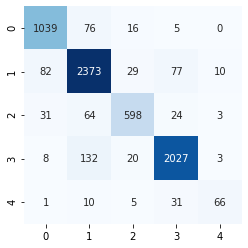

In [178]:
import seaborn as sns

#Calculamos la precisión y mostramos la matriz de confusión
acc = metrics.accuracy_score(y_test, predictions)
mat = metrics.confusion_matrix(y_test, predictions)

print ("Precisión del clasificador: %.2f " %(acc*100.0) )
print ("\nMatriz de Confusión: \n", mat)

#Esta es otra forma de ver la matriz de confusión
sns.heatmap(mat, square=True, annot=True, fmt="d", cbar=False, cmap="Blues")

In [179]:
## Validación cruzada.
#
from sklearn import model_selection
x_train_tfidf = TfidfVectorizer().fit_transform(x_train)

kfold = model_selection.StratifiedKFold(n_splits=10)
score = model_selection.cross_val_score(LinearSVC(C=1, random_state=1022021, max_iter=2000), x_train_tfidf, y_train, cv=kfold, scoring='accuracy')
#score = model_selection.cross_val_score(SVC(C=10, kernel='rbf', random_state=10022021, max_iter=5000), x_train_tfidf, y_train, cv=kfold, scoring='accuracy')
print(f"Accuracy: {round(score.mean()*100, 2)} (+/-{round(score.std()*100, 2)})")

Accuracy: 92.27 (+/-0.79)


In [180]:
## para guardar el modelo entrenado
#pickle.dump(text_clf, open('LinearSCV_3_PQR.sav', 'wb'))

In [183]:
## Desde acá se explorarán las curvas PR y el AUC para cada tipo de solicitud.
##
#M = TfidfVectorizer().fit_transform(datos_md['OBSERVACION USUARIO'])
M = TfidfVectorizer(ngram_range=(1,2), max_df=0.9, min_df=10).fit_transform(datos_md['OBSERVACION USUARIO'])
M.shape

(33649, 7334)

In [184]:
tipo_sol_int = []
for t in datos_md['tipo_solicitud']:
    if t == 'peticion':
        tipo_sol_int.append(0)
    elif t == 'queja':
        tipo_sol_int.append(1)
    elif t == 'reclamo':
        tipo_sol_int.append(2)
    elif t == 'pedidos/proyectos':
        tipo_sol_int.append(3)
    else:
        tipo_sol_int.append(4)


In [185]:
datos_md['tipo_sol_int'] = tipo_sol_int

In [186]:
datos_md

,tipo_solicitud,tipo_solicitud_1,OBSERVACION USUARIO,tipo_sol_int
0,peticion,gestionar financiacion,solicita financiación adeudado,0
1,peticion,datos basicos,usuario solicita cambio nombre instalacion nue...,0
2,peticion,poda de arboles,realizar poda coordinar visita cel usuario sol...,0
3,peticion,pago de la factura de otro usuario,solicita pagados instalacion periodo error pre...,0
4,peticion,tarjeta somos (pfs),usuario solicita nueva tarjeta pfs bloqueada d...,0
...,...,...,...,...
33644,queja,falla en la prestacion del servicio por contin...,usuaria inconforme servicio prestado chec debi...,1
33645,queja,inconformidad con el canal de atencion,desacuerdo respuesta entrego solicitud debido ...,1
33646,queja,falla en la prestacion del servicio por calidad,usuario solicita medio oficio escrito validaci...,1
33647,queja,falla en la prestacion del servicio por calidad,buenas tardes presente expresar inconformidad ...,1


In [187]:
## Guardamos este data frame 'datos_md' para trabajaren el segundo nivel con este mismo
##
'''with open('PQR_modelo.csv', 'w') as f:
    for item in datos_md:
        f.write("%s\n" % item)'''

'with open(\'PQR_modelo.csv\', \'w\') as f:\n    for item in datos_md:\n        f.write("%s\n" % item)'

In [188]:
from sklearn.preprocessing import label_binarize

label_binarize(datos_md['tipo_sol_int'], classes=[0,1,2,3,4])

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       ...,
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0]])

Average precision score, micro-averaged over all classes: 0.97


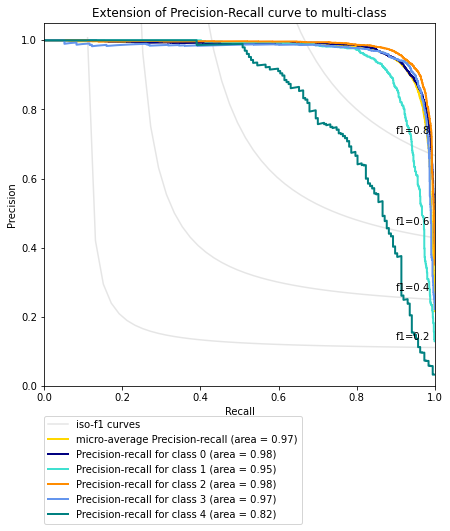

In [189]:
## Curva PR y F1
## La curva PR (precission-recall) es una opción apta para evaluar rendimiento de clasificadores
## donde las clases estan desbalanceadas. esta medida nos pernite observar la relacion entre
## la precision del clasificador y su sensibilidad.
##
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from itertools import cycle

#x = TfidfVectorizer().fit_transform(datos_md['OBSERVACION USUARIO'])
x = TfidfVectorizer(ngram_range=(1,2), max_df=0.9, min_df=10).fit_transform(datos_md['OBSERVACION USUARIO'])

y = label_binarize(datos_md['tipo_sol_int'], classes=[0,1,2,3,4])
n_classes = 5

# shuffle and split training and test sets
x_train, x_test, y_train, y_test =\
    train_test_split(x, y, test_size=0.33, random_state=0, stratify=y)

# ROC y AUC solo sirven en espacios de clasificacion binarios, por esta razon se 
# entrena un clasificador binario uno vs todos
clf = OneVsRestClassifier(LinearSVC(C=1, random_state=1022021, max_iter=2000))
#clf = OneVsRestClassifier(SVC(C=10, kernel='rbf', random_state=10022021, max_iter=5000))
y_score = clf.fit(x_train, y_train).decision_function(x_test)

# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i],
                                                        y_score[:, i])
    average_precision[i] = average_precision_score(y_test[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(y_test.ravel(),
    y_score.ravel())
average_precision["micro"] = average_precision_score(y_test, y_score,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision["micro"]))

# setup plot details
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal'])

plt.figure(figsize=(7, 8))
f_scores = np.linspace(0.2, 0.8, num=4)
lines = []
labels = []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    l, = plt.plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2)
    plt.annotate('f1={0:0.1f}'.format(f_score), xy=(0.9, y[45] + 0.02))

lines.append(l)
labels.append('iso-f1 curves')
l, = plt.plot(recall["micro"], precision["micro"], color='gold', lw=2)
lines.append(l)
labels.append('micro-average Precision-recall (area = {0:0.2f})'
              ''.format(average_precision["micro"]))

for i, color in zip(range(n_classes), colors):
    l, = plt.plot(recall[i], precision[i], color=color, lw=2)
    lines.append(l)
    labels.append('Precision-recall for class {0} (area = {1:0.2f})'
                  ''.format(i, average_precision[i]))

fig = plt.gcf()
fig.subplots_adjust(bottom=0.25)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Extension of Precision-Recall curve to multi-class')
plt.legend(lines, labels, loc=(0, -.38), prop=dict(size=10))


plt.show()

In [190]:
## Ensayo Peticion
text_ensayo = text_normalization('quiero que me envien una copia de la factura al correo electronico')
text_ensayo

'quiero envien copia factura correo electronico'

In [191]:
text_clf.predict([text_ensayo])

array(['peticion'], dtype=object)

In [192]:
## Ensayo Reclamo
text_ensayo = text_normalization('por que los cobros de la luz se han incrementado tanto en el ultimo mes')
text_ensayo

'cobros luz incrementado ultimo mes'

In [193]:
text_clf.predict([text_ensayo])

array(['reclamo'], dtype=object)

In [194]:
## Ensayo Pedidos/Proyectos
text_ensayo = text_normalization('quisiera que removieran el poste de luz que hay al lado de mi casa ya que construiré una segunda planta y este obstruye la obra')
text_ensayo

'quisiera removieran poste luz lado casa construiré segunda planta obstruye obra'

In [195]:
text_clf.predict([text_ensayo]) 

array(['pedidos/proyectos'], dtype=object)

In [196]:
## Ensayo Queja
text_ensayo = text_normalization('Tengo una inconformidad respecto al servicio, la luz se va muchas veces al mes')
text_ensayo

'inconformidad respecto servicio luz va muchas veces mes'

In [197]:
text_clf.predict([text_ensayo])

array(['queja'], dtype=object)

In [198]:
## Ensayo Recurso
text_ensayo = text_normalization('no me encuentro de acuerdo con la respuesta al reclamo quiero poner un recurso de reposición')
text_ensayo

'encuentro acuerdo respuesta reclamo quiero poner recurso reposición'

In [199]:
text_clf.predict([text_ensayo])

array(['recurso'], dtype=object)